In [1]:
import scipy.constants as consts
from lib.AtomNumbers import QD, Rb87, State, TransitionFrequency, TermEnergy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s1 = State(5,0,0.5)
s2 = State(5,1,1.5)
TransitionFrequency(Rb87, s1, s2)

[384230484574228.94, 'Hz', None]

In [3]:
spectral_lines = []
n_max = 150
l_max = 3 # stop at f
sI = State(5,0,0.5)
for n in range(0,150): # some of these are non-physical
    spectral_lines.append([])
    for l in range(0,l_max+1):
        spectral_lines[n].append(dict())
        for j in np.arange(abs(l-0.5),l+1): # l+0.5 doesn't regiser the second j value
            spectral_lines[n][l][str(j)] = TransitionFrequency(Rb87,sI,State(n,l,j))

### S-lines

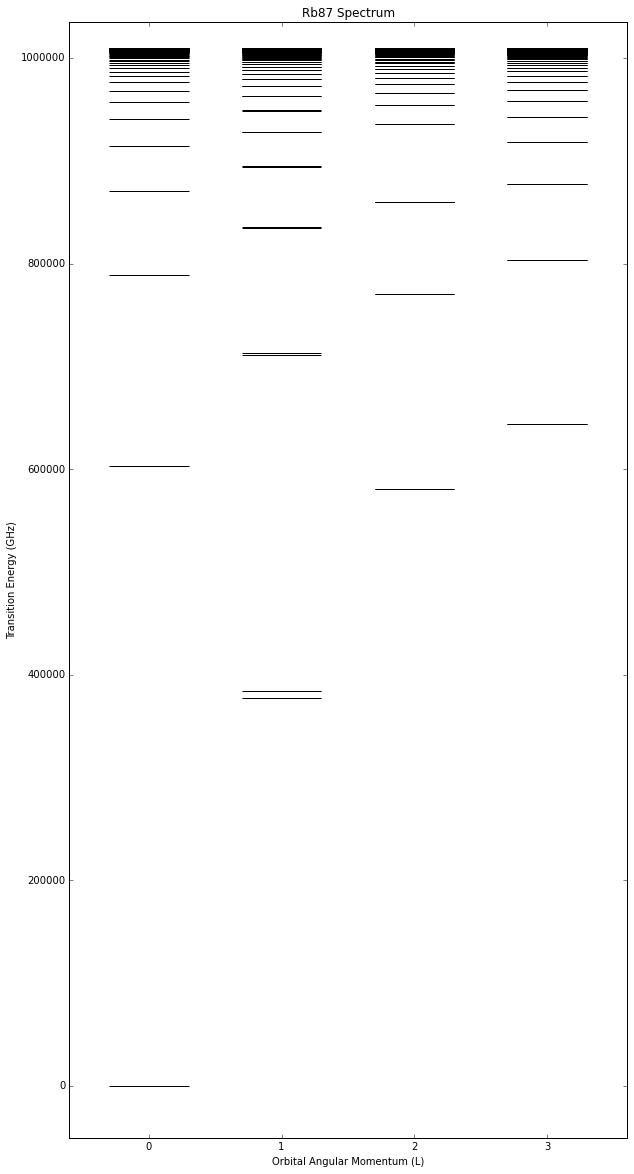

In [6]:
plt.figure(figsize=(10,20))

for l in range(0,l_max+1):
  for j in np.arange(abs(l-0.5),l+1):
    if l < 2:
      n_min = 5
    else:
      n_min = 5 - (l-1)
    plt.hlines([spectral_lines[n][l][str(j)][0]*1e-9 for n in range(n_min,n_max)], [l-0.3], [l+0.3])
plt.xlabel('Orbital Angular Momentum (L)')
plt.ylabel('Transition Energy (GHz)')
plt.title('Rb87 Spectrum')
plt.axis([-0.6, l_max+0.6, 1e-9*0.05*consts.c*TermEnergy(Rb87,State(5,0,0.5))[0], -1e-9*1.025*consts.c*TermEnergy(Rb87,State(5,0,0.5))[0]])

plt.show()

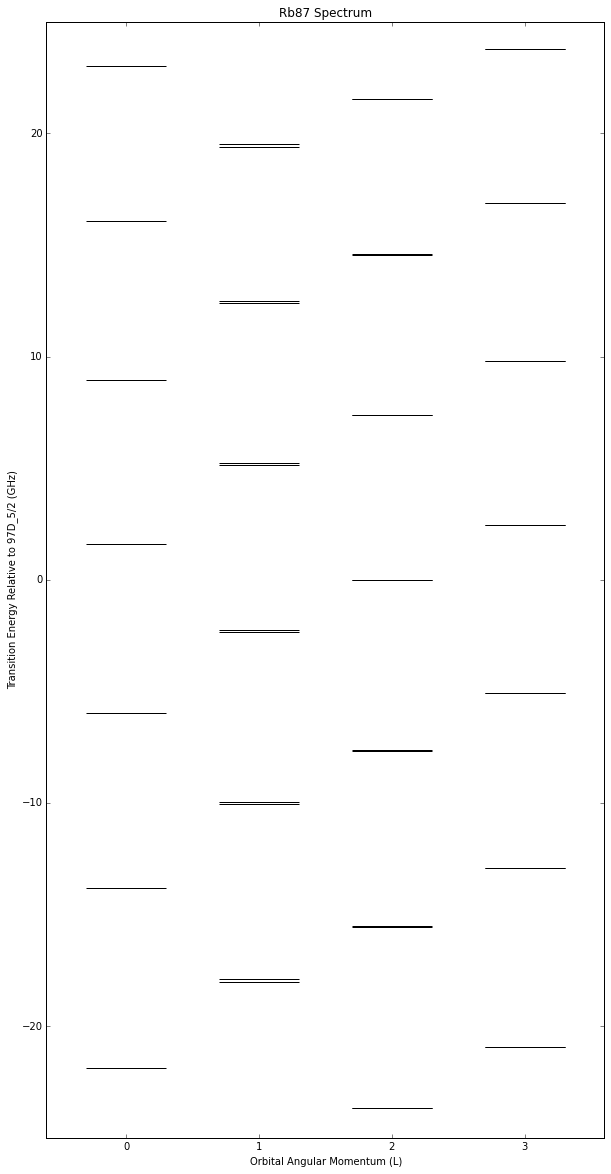

In [7]:
plt.figure(figsize=(10,20))

f_0 = spectral_lines[97][2]['2.5'][0]
for l in range(0,l_max+1):
  for j in np.arange(abs(l-0.5),l+1):
    n_min=80
    plt.hlines([(spectral_lines[n][l][str(j)][0]-f_0)*1e-9 for n in range(n_min,n_max)], [l-0.3], [l+0.3])
plt.xlabel('Orbital Angular Momentum (L)')
plt.ylabel('Transition Energy Relative to 97D_5/2 (GHz)')
plt.title('Rb87 Spectrum')
plt.axis([-0.6, l_max+0.6, -25, 25])

plt.show()

## Compare to Mark's code with older values

In [8]:
sI = State(5,0,0.5)
test_cases = [
    ( State(5,1,1.5), 3.8423048447e14 ),
    ( State(6,1,1.5), 7.1328393381e14 ),
    ( State(43,2,2.5), 1.0081288175e15 ),
    ( State(97,0,0.5), 1.0096515566e15 ),
    ( State(97,2,2.5), 1.0096653597e15 ),
    ( State(111,0,0.5), 1.0097421827e15),
    ( State(111,2,2.5), 1.0097513117e15),
]

for s, f_old in test_cases:
    f_new = TransitionFrequency(Rb87, sI, s)
    print("{}\t: {} {}".format(s, f_new[0] - f_old, f_new[1]))

5P_3/2	: 104228.9375 Hz
6P_3/2	: -2132.125 Hz
43D_5/2	: 63315.625 Hz
97S_1/2	: -3326.0 Hz
97D_5/2	: 16258.25 Hz
111S_1/2	: -46443.0 Hz
111D_5/2	: -41244.25 Hz
